<a href="https://colab.research.google.com/github/tanjimmostafa/Bias-detection-bangla-word-embeddings/blob/main/Detecting_Gender_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Bangla Word2vec Model

In [ ]:
!pip install -U bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=750ef40e4bd55c2c9ba7fd8ca3fa3b7cc91f0d585e3ab6fc9d583235d0910e42
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.99
    Uninstalling sentencepiece-0.1.99:
      Successfully uninstalled sentencepiece-0.1.99
  Attempting u

In [ ]:
!mkdir models
%cd models

/content/models


In [ ]:
!wget https://huggingface.co/sagorsarker/bangla_word2vec/resolve/main/bangla_word2vec_gen4.zip
!unzip bangla_word2vec_gen4.zip
!rm -rf bangla_word2vec_gen4.zip

--2024-05-15 20:36:52--  https://huggingface.co/sagorsarker/bangla_word2vec/resolve/main/bangla_word2vec_gen4.zip
Resolving huggingface.co (huggingface.co)... 13.33.30.49, 13.33.30.76, 13.33.30.23, ...
Connecting to huggingface.co (huggingface.co)|13.33.30.49|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/f5/12/f51294acf565f8e7f2b231a61a327e6a79fce680615e3bbbc4850f166e928650/b157fe019ddda848f0195240f636ff2dcb63cbe823c84eed77c129e196105fd1?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27bangla_word2vec_gen4.zip%3B+filename%3D%22bangla_word2vec_gen4.zip%22%3B&response-content-type=application%2Fzip&Expires=1716064612&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNjA2NDYxMn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9mNS8xMi9mNTEyOTRhY2Y1NjVmOGU3ZjJiMjMxYTYxYTMyN2U2YTc5ZmNlNjgwNjE1ZTNiYmJjNDg1MGYxNjZlOTI4NjUwL2IxNTdmZTAxOWRkZGE4NDhmMDE

In [ ]:
%cd ..

/content


# Checking the words in the Word2vec Vocab

In [ ]:
from collections import defaultdict
import time
import gensim
word2vec_model_path = "models/bangla_word2vec/bnwiki_word2vec.model"
word2vec_model = gensim.models.Word2Vec.load(word2vec_model_path)

start = time.time()
word_list = ['ছেলে', 'মেয়ে', 'পুরুষ', 'মহিলা', 'ডাক্তার', 'নার্স', 'I', 'he', 'she', 'Doctor']
for word in word_list:
  if word in word2vec_model.wv.key_to_index:
    pass
  else:
    print(f'{word} Not Found in the vocab')

print('Total time executed', time.time()-start, 'Avg time for finding word to vec', (time.time()-start)/len(word_list))

মেয়ে Not Found in the vocab
Total time executed 0.0015916824340820312 Avg time for finding word to vec 0.0001592397689819336


# Detecting Bias by Finding Most Common Word via Gender Direction Projection

In [ ]:
import numpy as np

gender_direction = word2vec_model.wv['পুরুষ'] - word2vec_model.wv['মহিলা']

gender_specific_words = [ 'শক্তি','ডাক্তার','পরিচালক', 'ক্যাশিয়ার','শিক্ষক','নার্স','সেবিকা','সহকারী','ম্যানেজার','আইনজীবী','কৃষক','চালক','বিক্রেতা','চিকিত্সক','গার্ড','বিজ্ঞানী','লেখক']
similarities_boy = {}
similarities_girl = {}

for word in gender_specific_words:
#for word in word2vec_model.wv.key_to_index:
    vector = word2vec_model.wv[word]
    similarity = np.dot(gender_direction, vector) / (np.linalg.norm(gender_direction) * np.linalg.norm(vector))
    similarities_boy[word] = similarity
    # Similarity in Opposite Direction
    similarity = np.dot(-gender_direction, vector) / (np.linalg.norm(gender_direction) * np.linalg.norm(vector))
    similarities_girl[word] = similarity



sorted_words_boy = sorted(similarities_boy, key=similarities_boy.get, reverse=True)
sorted_words_girl = sorted(similarities_girl, key=similarities_girl.get, reverse=True)


num_words = 10
top_words_he = sorted_words_boy[:num_words]
print("Top biased words for 'পুরুষ':")
for word in top_words_he:
    print(word, similarities_boy[word])

top_words_she = sorted_words_girl[:num_words]
print("\nTop biased words for 'মহিলা':")
for word in top_words_she:
    print(word, similarities_girl[word])


Top biased words for 'পুরুষ':
শক্তি 0.12699015
লেখক 0.031250235
চালক -0.026816102
কৃষক -0.031428378
বিজ্ঞানী -0.034010585
চিকিত্সক -0.042528506
সেবিকা -0.071175575
ডাক্তার -0.07822161
বিক্রেতা -0.08101114
পরিচালক -0.083377324

Top biased words for 'মহিলা':
গার্ড 0.29307142
আইনজীবী 0.2574893
ম্যানেজার 0.16971758
নার্স 0.15421136
শিক্ষক 0.12090514
সহকারী 0.108566284
ক্যাশিয়ার 0.09312599
পরিচালক 0.083377324
বিক্রেতা 0.08101114
ডাক্তার 0.07822161


# Detecting Bias Performing PCA

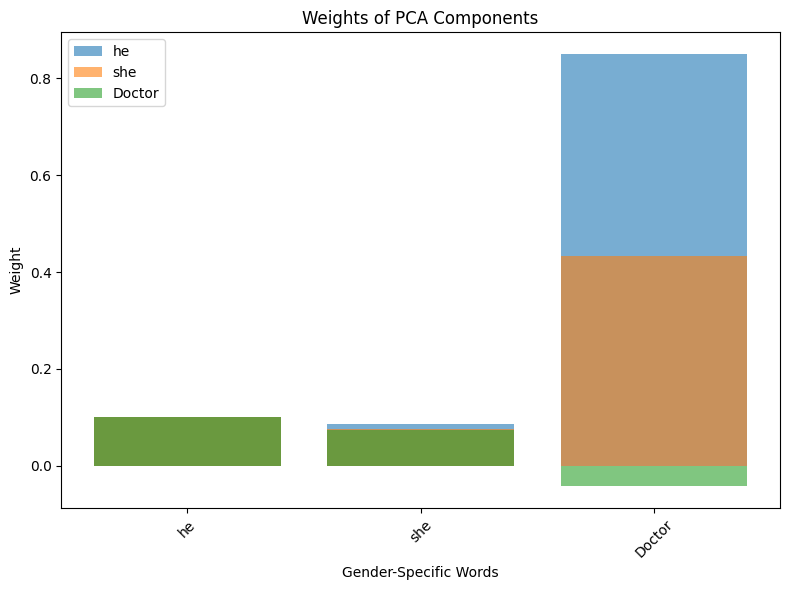

In [ ]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from matplotlib.font_manager import FontProperties

# Configure Bangla font
#bangla_font = FontProperties(fname='kalpurush.ttf')

gender_specific_words = ['he', 'she', 'Doctor']
word_embeddings = [word2vec_model.wv[word] for word in gender_specific_words]

# Create the gender direction matrix
gender_direction_matrix = np.array(word_embeddings)

# Standardize the matrix
mean = np.mean(gender_direction_matrix, axis=0)
std = np.std(gender_direction_matrix, axis=0)
standardized_matrix = (gender_direction_matrix - mean) / std

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_matrix)

weights = pca.components_

# Visualization
plt.figure(figsize=(8, 6))
for i, word in enumerate(gender_specific_words):
    plt.bar(range(len(gender_specific_words)), weights[:, i], alpha=0.6, label=word)

plt.xticks(range(len(gender_specific_words)), gender_specific_words, rotation=45)
plt.xlabel('Gender-Specific Words')
plt.ylabel('Weight')
plt.title('Weights of PCA Components')
plt.legend()
plt.tight_layout()
plt.show()

# Detecting Bias For Bangla Word using PCA

Mounted at /content/drive


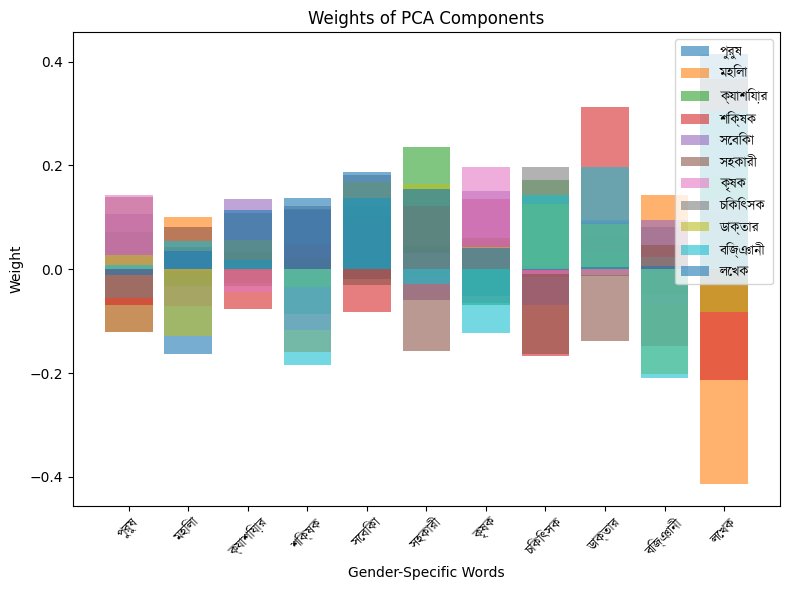

In [ ]:
# Download Kalpurush from the link : https://www.omicronlab.com/bangla-fonts.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.font_manager import FontProperties

# Configure Bangla font
from google.colab import drive
drive.mount('/content/drive')
font_path = '/content/drive/My Drive/Colab Notebooks/kalpurush.ttf'
bangla_font = FontProperties(fname=font_path)

gender_specific_words = [ 'পুরুষ', 'মহিলা', 'ক্যাশিয়ার','শিক্ষক','সেবিকা','সহকারী','কৃষক','চিকিৎসক','ডাক্তার','বিজ্ঞানী','লেখক',]
word_embeddings = [word2vec_model.wv[word] for word in gender_specific_words]

# Create the gender direction matrix
gender_direction_matrix = np.array(word_embeddings)

# Standardize the matrix
mean = np.mean(gender_direction_matrix, axis=0)
std = np.std(gender_direction_matrix, axis=0)
standardized_matrix = (gender_direction_matrix - mean) / std

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_matrix)

weights = pca.components_

# Visualization
plt.figure(figsize=(8, 6))
for i, word in enumerate(gender_specific_words):
    plt.bar(range(len(gender_specific_words)), weights[:, i], alpha=0.6, label=word)

plt.xticks(range(len(gender_specific_words)), gender_specific_words, rotation=45, fontproperties=bangla_font)
plt.xlabel('Gender-Specific Words')
plt.ylabel('Weight')
plt.title('Weights of PCA Components')
plt.legend(prop=bangla_font)
plt.tight_layout()
plt.show()


# Detecting Bias For Bangla Word using Cosine Similarity in the Gender Subspace

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# genders = ['পুরুষ', 'ছেলে', 'মহিলা', 'মেয়ে']

# Calculate cosine similarity between gender-specific words
similarity_matrix = cosine_similarity(standardized_matrix)
for i, word1 in enumerate(gender_specific_words):
  for j, word2 in enumerate(gender_specific_words):
        similarity = similarity_matrix[i, j]
        print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")

Cosine similarity between 'পুরুষ' and 'পুরুষ': 1.0000
Cosine similarity between 'পুরুষ' and 'মহিলা': 0.3272
Cosine similarity between 'পুরুষ' and 'ক্যাশিয়ার': -0.1579
Cosine similarity between 'পুরুষ' and 'শিক্ষক': -0.1925
Cosine similarity between 'পুরুষ' and 'সেবিকা': -0.2606
Cosine similarity between 'পুরুষ' and 'সহকারী': -0.2737
Cosine similarity between 'পুরুষ' and 'কৃষক': -0.1105
Cosine similarity between 'পুরুষ' and 'চিকিৎসক': -0.2949
Cosine similarity between 'পুরুষ' and 'ডাক্তার': -0.2862
Cosine similarity between 'পুরুষ' and 'বিজ্ঞানী': -0.1517
Cosine similarity between 'পুরুষ' and 'লেখক': -0.1590
Cosine similarity between 'মহিলা' and 'পুরুষ': 0.3272
Cosine similarity between 'মহিলা' and 'মহিলা': 1.0000
Cosine similarity between 'মহিলা' and 'ক্যাশিয়ার': 0.0026
Cosine similarity between 'মহিলা' and 'শিক্ষক': -0.2208
Cosine similarity between 'মহিলা' and 'সেবিকা': 0.0312
Cosine similarity between 'মহিলা' and 'সহকারী': -0.2690
Cosine similarity between 'মহিলা' and 'কৃষক': 0.02

In [ ]:
# prompt: perform permutation test with a call function and use gender_specific_words as the wordset list

def permutation_test(wordset, num_permutations=1000):
  # Calculate cosine similarity between gender-specific words
  similarity_matrix = cosine_similarity(standardized_matrix)

  # Calculate the average cosine similarity for the original wordset
  original_similarity = np.mean(similarity_matrix)

  # Initialize list to store permuted similarities
  permuted_similarities = []

  # Perform permutations
  for _ in range(num_permutations):
    # Shuffle the wordset
    permuted_words = np.random.permutation(wordset)

    # Calculate cosine similarity for the permuted wordset
    permuted_matrix = standardized_matrix[np.argsort(permuted_words)]
    permuted_similarity_matrix = cosine_similarity(permuted_matrix)
    permuted_similarity = np.mean(permuted_similarity_matrix)

    # Store the permuted similarity
    permuted_similarities.append(permuted_similarity)

  # Calculate the p-value
  p_value = (np.sum(np.array(permuted_similarities) > original_similarity) + 1) / (num_permutations + 1)

  return p_value

# Perform permutation test with gender_specific_words
p_value = permutation_test(gender_specific_words)

print(f"P-value: {p_value:.4f}")



P-value: 1.0000
